# RAG Langchain with Unstructured PDF
Name      : NLP A<br>
Subject   : RAG Langchain with Unstructured PDF
<br><br>
This code is can be run on Google Colab since this is a Jupyter Notebook file (upload this ipynb to Colab).<br>
If using Google Colab, run this code below to verify Nvidia GPU Driver and install the libraries:

In [ ]:
!nvidia-smi

Wed Sep 11 14:36:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#### Install PCI utils for Ollama GPU support, libs for Poppler PDF and Tesseract-ocr for image PDF reader

In [ ]:
!sudo apt-get update
!sudo apt-get install -qq -y pciutils
!sudo apt-get install -qq -y libxml2 libxslt1-dev libmagic-dev
!sudo apt-get install -qq -y libnss3 libnss3-dev
!sudo apt-get install -qq -y libcairo2-dev libjpeg-dev libgif-dev
!sudo apt-get install -qq -y cmake libblkid-dev e2fslibs-dev libboost-all-dev libaudit-dev
!sudo apt-get install -qq -y tesseract-ocr
!sudo apt-get install -qq -y libpoppler-dev poppler-utils

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [998 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,224 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,571 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,

In [ ]:
!pip install -q pyngrok

In [ ]:
!curl -fsSL https://ollama.com/install.sh | sh
!ollama serve > server.log 2>&1 &
!ollama pull nomic-embed-text
!ollama pull llama3.1

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> NVIDIA GPU installed.
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.
pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest 
pulling 970aa74c0a90...   0% ▕▏    0 B/274 MB                  pulling manifest 
pulling 970aa74c0a90...   0% ▕▏    0 B/274 MB                  pulling manifest 
pulling 970aa74

In [ ]:
!pip install -q numpy==1.26.4
!pip install -q protobuf==4.25.4
!pip install -q chromadb==0.4.24
!pip install -q onnx==1.16.1
!pip install -q onnxruntime==1.17.1 onnxruntime-gpu==1.17.1
!pip install -q rapidocr-onnxruntime
!pip install -q datasets==2.18.0
!pip install -q pytesseract
!pip install -U -q nltk
!pip install -U -q langchain langchain-core langchain-community
!pip install -U -q langchain-chroma langchain-ollama langchain-huggingface langchainhub langserve langsmith
!pip install -U -q langchain-unstructured unstructured-client unstructured "unstructured[all-docs]" python-magic pydantic lxml pypdf pymupdf
!pip install -U -q ragas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 6.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 7.3 MB/s eta 0:00

In [ ]:
!curl -o Ciptaker.pdf "https://github.com/shabir67/rag_lama_indonesia_employment-law/blob/main/Ciptaker-553-581.pdf"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  269k    0  269k    0     0   256k      0 --:--:--  0:00:01 --:--:--  256k


In [ ]:
!ls -l

total 280
-rw-r--r-- 1 root root 275627 Sep 11 14:42 Ciptaker.pdf
drwxr-xr-x 1 root root   4096 Sep  9 13:22 sample_data
-rw-r--r-- 1 root root   3289 Sep 11 14:40 server.log


In [ ]:
# !rm -f Ciptaker.pdf

In [ ]:
# !ls -l

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

### Table of Contents
1. Data Preprocessing
2. Retrieval Strategy
3. Model Selection
4. Evaluation Dataset Creation
5. Evaluation
6. Recommendation

### 1. Data Preprocessing
Here we are preparing the required libraries and load the PDF with `UnstructuredPDFLoader`

<b>Import the required libraries</b><br>
- Langchain: main library/tools for RAG
- Chroma: for storing vector databases that generated from Embeddings
- RecursiveCharacterSplitter: use the recursive text splitter for splitting documents
- UnstructurdPDFLoader: for loading unstructured documents like PDFs.
- ChatOllama: use open-source Ollama for Chat LLMs.
- Ollama Embeddings: use open-source Ollama for Embeddings.
- ChatPromptTemplate and PromptTemplate: template for inserting the prompts.
- StrOutputParser: string output parsers.
- RunnablePassthrough: runnable for passing the question inputs from the user.
- MultiQueryRetriever: the main Retrieval method that we want to use.

In [ ]:
from langchain_core.messages import (
    AIMessage,
    HumanMessage,
    SystemMessage
)
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import UnstructuredPDFLoader
from langchain_community.document_loaders import PyPDFLoader

from langchain_chroma import Chroma
from langchain_community.chat_models import ChatOllama
from langchain_community.embeddings import OllamaEmbeddings
from langchain.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain.retrievers.multi_query import MultiQueryRetriever

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<b>Load the document</b><br>
Let's load the paper

In [ ]:
loader = UnstructuredPDFLoader('/content/drive/MyDrive/final-project/RUU Cipta Kerja-553-581.pdf')
data = loader.load()

Display head of paper

In [ ]:
print(data[0].page_content[:1000])

BAB IV

KETENAGAKERJAAN

Bagian Kesatu

Umum

Pasal 88

Dalam rangka penguatan perlindungan kepada tenaga kerja dan

meningkatkan peran tenaga kerja dalam mendukung ekosistem

investasi, Undang-Undang ini mengubah, menghapus, atau

menetapkan pengaturan baru beberapa ketentuan yang diatur

dalam:

a. Undang-Undang Nomor

13

Tahun

2003

tentang

Ketenagakerjaan

(Lembaran Negara Republik

Indonesia

Tahun 2003 Nomor 39, Tambahan Lembaran Negara

Republik Indonesia 4279);

b. Undang-Undang Nomor 40 Tahun 2004 tentang Sistem

Jaminan Sosial Nasional

(Lembaran Negara Republik

Indonesia Tahun 2004 Nomor 150, Tambahan Lembaran

Negara Republik Indonesia 4456); dan

c. Undang-Undang Nomor 24 Tahun 2011 tentang Badan

Penyelenggara Jaminan Sosial (Lembaran Negara Republik

Indonesia Tahun 2011 Nomor 116, Tambahan Lembaran

Negara Republik Indonesia 5256).

Bagian Kedua

Ketenagakerjaan

Pasal 89

Beberapa ketentuan dalam Undang-Undang Nomor 13 Tahun

2003 tentang Ketenagakerjaan

(Lembaran

<b>Splitting document</b>

For Splitting documents, there is two known method from Langchain:
- `CharacterTextSplitter`: This is a simpler method that splits the text based on a specified character, such as spaces or newlines.
- `RecursiveCharacterTextSplitter`: This method is more advanced and versatile. It attempts to split the text using a series of separators in a hierarchical or recursive manner. For example, it might first try to split the text at paragraph breaks (\n\n), and if the resulting chunks are too large, it then tries to split by single newlines (\n), and if necessary, by spaces, and finally by individual characters.

In [ ]:
# Split and chunk
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
chunks = text_splitter.split_documents(data)

### 2. Retrieval Strategy
For Retrieval Strategy: here we will be using Dense Retrieval (Embedding Vectors) and `MultiQueryRetriever`, it can send multiple queries at one time and one prompt.

<b>Adding Vector Databases to ChromaDB</b><br>
We will using `OllamaEmbeddings` with model: `nomic-embed-text`<br>(open-source Embedding model that claimed surpasses OpenAI `text-embedding-ada-002` and `text-embedding-3-small`, <a href="https://ollama.com/library/nomic-embed-text">[source]</a>)
<br>
Then we need to store the Embedding vectors into Vector Database from ChromaDB

In [ ]:
# Add to vector database
vector_db = Chroma.from_documents(
    documents=chunks,
    embedding=OllamaEmbeddings(model="nomic-embed-text",show_progress=True),
    collection_name="attention-paper-rag",
    persist_directory="./local-rag-attention"
)

OllamaEmbeddings: 100%|██████████| 49/49 [00:08<00:00,  5.50it/s]


### 3. Model Selection
Load the LLM Chat model, we will be using the latest Llama3.1: open-source LLM that improved from Llama3.<br>
For detailed bechmarks and comparisons, here: https://blog.gopenai.com/llama-3-1-vs-llama-3-differences-d3d23e09607f

Why use open-source LLMs? Well, there's several reasons:
- Deployment can be local and anywhere
- No need to pay or subscription services
- Privacy matters, as open-source LLMs runs on local, privacy stays on local machine
- Open-source models has worldwide contributions unlike closed-source is classified contributions
- Open-source has massive support of community developers like HuggingFace, llama.cpp, Ollama, Langchain, etc.

In [ ]:
llm = ChatOllama(model='llama3.1')

Define the Query Prompt Template

In [ ]:
QUERY_PROMPT = PromptTemplate(
    input_variables=["question"],
    template="""You are an AI language model assistant. Your task is to generate five
    different versions of the given user question to retrieve relevant documents from
    a vector database. By generating multiple perspectives on the user question, your
    goal is to help the user overcome some of the limitations of the distance-based
    similarity search. Provide these alternative questions separated by newlines.
    Original question: {question}""",
)

In [ ]:
retriever = MultiQueryRetriever.from_llm(
    vector_db.as_retriever(),
    llm,
    prompt=QUERY_PROMPT
)

# RAG prompt
template = """Answer the question based ONLY on the following context:
{context}
Question: {question}
"""

prompt = ChatPromptTemplate.from_template(template)

In [ ]:
chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

<b>Still about Retrieval Strategy</b>

Create the Retrieval Chains

### 4. Evaluation Dataset Creation
Develop an evaluation dataset that reflects realistic queries researchers might have. Include both simple and complex queries (multi-hop, comparing two things, multiple questions in one prompt) that test the system's ability to retrieve and generate accurate information. Around 20 questions should be enough.

In [ ]:
qa_pairs= [
    # 1
    {
        "question": "Apa nama lain dari Undang-Undang Cipta Kerja?",
        "answer": "Undang-Undang Cipta Kerja juga disebut sebagai Omnibus Law."
    },
    # 2
    {
        "question": "Kapan Undang-Undang Cipta Kerja disahkan?",
        "answer": "Undang-Undang Cipta Kerja disahkan pada 5 Oktober 2020."
    },
    # 3
    {
        "question": "Apa tujuan utama dari Undang-Undang Cipta Kerja?",
        "answer": "Tujuannya adalah untuk menciptakan lapangan kerja dan meningkatkan investasi dengan mengurangi persyaratan peraturan."
    },
    # 4
    {
        "question": "Berapa banyak undang-undang yang diamandemen oleh UU Cipta Kerja?",
        "answer": "UU Cipta Kerja mengamandemen 79 undang-undang."
    },
    # 5
    {
        "question": "Apa kritik utama terhadap Undang-Undang Cipta Kerja?",
        "answer": "Kritik utama adalah UU ini dianggap menguntungkan perusahaan besar dan merugikan hak-hak pekerja serta lingkungan."
    },
    # 6
    {
        "question": "Apa status UU Cipta Kerja setelah diputuskan oleh Mahkamah Konstitusi?",
        "answer": "Mahkamah Konstitusi menyatakan UU Cipta Kerja 'inkonstitusional bersyarat' dan harus diperbaiki hingga 25 November 2023."
    },
    # 7
    {
        "question": "Siapa yang mendukung pengesahan Undang-Undang Cipta Kerja?",
        "answer": "Pendukung pengesahan UU Cipta Kerja termasuk PDIP, Golkar, Gerindra, NasDem, PKB, PAN, dan PPP."
    },
    # 8
    {
        "question": "Apa yang terjadi pada pembayaran pesangon dalam UU Cipta Kerja?",
        "answer": "UU Cipta Kerja mengurangi batas pembayaran pesangon dari 32 bulan gaji menjadi 19 bulan gaji."
    },
    # 9
    {
        "question": "Bagaimana aturan tentang upah minimum dalam UU Cipta Kerja?",
        "answer": "Upah minimum ditentukan berdasarkan inflasi dan pertumbuhan ekonomi, serta ada syarat tertentu untuk UMK."
    },
    # 10
    {
        "question": "Apa yang diatur terkait waktu kerja dan cuti dalam UU Cipta Kerja?",
        "answer": "Waktu kerja lembur diatur hingga maksimal 4 jam sehari, dan hari libur berkurang menjadi 1 hari seminggu."
    },
    # 11
    {
        "question": "Bagaimana aturan pekerja asing dalam UU Cipta Kerja?",
        "answer": "UU Cipta Kerja melonggarkan aturan untuk mempermudah perekrutan tenaga kerja asing."
    },
    # 12
    {
        "question": "Apa dampak UU Cipta Kerja terhadap lingkungan?",
        "answer": "Peraturan lingkungan dilonggarkan, terutama untuk proyek berisiko rendah, sementara proyek berisiko tinggi masih harus menyertakan analisis dampak lingkungan."
    },
    # 13
    {
        "question": "Apa peran pemerintah pusat dalam penggunaan lahan berdasarkan UU Cipta Kerja?",
        "answer": "Pemerintah pusat diberi wewenang penuh atas izin penggunaan lahan dalam UU Cipta Kerja."
    },
    # 14
    {
        "question": "Bagaimana dampak UU Cipta Kerja terhadap perpajakan perusahaan?",
        "answer": "Pajak penghasilan badan akan diturunkan secara bertahap menjadi 20% pada 2025."
    },
    # 15
    {
        "question": "Apa yang diatur tentang investasi dalam UU Cipta Kerja?",
        "answer": "UU Cipta Kerja mengurangi daftar sektor yang dilarang untuk investasi swasta dari 300 menjadi hanya 6 sektor."
    },
    # 16
    {
        "question": "Bagaimana dampak UU Cipta Kerja terhadap sektor televisi digital?",
        "answer": "UU Cipta Kerja mengatur tentang penghentian siaran analog paling lambat dua tahun setelah diberlakukan."
    },
    # 17
    {
        "question": "Apa tanggapan serikat buruh internasional terhadap UU Cipta Kerja?",
        "answer": "Serikat Buruh Internasional mengkritik UU ini, menyebutnya merugikan hak-hak buruh."
    },
    # 18
    {
        "question": "Apa tanggapan berbagai gubernur di Indonesia terhadap UU Cipta Kerja?",
        "answer": "Beberapa gubernur, seperti Ridwan Kamil dan Sutarmidji, meminta Presiden untuk mengeluarkan Perppu guna membatalkan UU Cipta Kerja."
    },
    # 19
    {
        "question": "Bagaimana penggunaan influencer dalam mendukung UU Cipta Kerja?",
        "answer": "Beberapa influencer media sosial dibayar untuk mempromosikan UU Cipta Kerja, meski kemudian dikritik keras oleh masyarakat."
    },
    # 20
    {
        "question": "Apa yang memicu unjuk rasa terkait UU Cipta Kerja?",
        "answer": "Unjuk rasa dipicu oleh kekhawatiran bahwa UU ini merugikan hak-hak pekerja diantaranya dengan mengurangi pesangon, memotong cuti wajib, memperbolehkan jam kerja lebih lama, dan memperbolehkan mempekerjakan pekerja kontrak, serta merugikan lingkungan khususnya yang akan menyebabkan penggundulan hutan."
    },
    # 21
    {
        "question": "Kapan dan dimana unjuk rasa terkait UU Cipta Kerja terjadi?",
        "answer": "Sejak Januari 2020, berbagai unjuk rasa digelar di beberapa daerah Indonesia dengan titik orasi berada di depan gedung DPRD dan jalan-jalan lainnya. Puncak demonstrasi di berbagai daerah Indonesia terjadi pada 7-8 Oktober 2020."
    },
    # 22
    {
        "question": "Apa yang terjadi saat unjuk rasa terkait UU Cipta Kerja?",
        "answer": "Beberapa protes berlangsung damai, sementara yang lain berubah menjadi kekerasan, menyebabkan kerusakan properti, serta korban jiwa dan penangkapan. Salah satu peristiwa yang terjadi adalah Halte TransJakarta Bundaran HI dibakar pada tanggal 8 Oktober 2020."
    }
]

In [ ]:
## cosine similarity
import math
import re
from collections import Counter as Count

word = re.compile(r"\w+")

def cosine_similarity(vector_1, vector_2):
    inter = set(vector_1.keys()) & set(vector_1.keys())
    numer = sum([vector_1[i] * vector_2[i] for i in inter])

    s_1 = sum([vector_1[i] ** 2 for i in list(vector_1.keys())])
    s_2 = sum([vector_1[i] ** 2 for i in list(vector_1.keys())])
    deno = math.sqrt(s_1) * math.sqrt(s_2)

    if not deno:
        return 0.0
    else:
        return float(numer) / deno

def generate_vectors(sent):
    w = word.findall(sent)
    return Count(w)

In [ ]:
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain.evaluation import load_evaluator
import pandas as pd
import matplotlib.pyplot as plt

progress_df = pd.DataFrame(columns=["question", "generated_answer", "original_answer", "similarity"])

def process_qa_pairs_with_rag(qa_pairs, retriever, chain):
    contexts = []
    answers = []

    for i, qa_pair in enumerate(qa_pairs):
        # Simulate the retrieval process
        global progress_df  # Track globally
        content = []
        retrieval = retriever.invoke(qa_pair["question"])  # Replace with real retriever invocation

        for item in retrieval:
            content.append(item.page_content)
        contexts.append(content)

        # Simulate invoking answer generation based on the retrieved context
        answer = chain.invoke(qa_pair["question"])  # Replace with real chain invocation
        answers.append(answer)

        # Print the question, generated answer, and the original answer
        print(f"Question {i + 1}: {qa_pair['question']}")
        print(f"Generated Answer {i + 1}: {answer}")
        print(f"Original Answer {i + 1}: {qa_pair['answer']}\n")

        vec_1 = generate_vectors(answer)
        vec_2 = generate_vectors(qa_pair['answer'])

        sim = cosine_similarity(vec_1, vec_2)

        print("Similarity(cosine):", sim)

         # Append the progress to the DataFrame
        new_row = pd.DataFrame({
            "question": [qa_pair["question"]],
            "generated_answer": [answer],
            "original_answer": [qa_pair["answer"]],
            "similarity": [sim]
        })

        progress_df = pd.concat([progress_df, new_row], ignore_index=True)


# Call the process function
process_qa_pairs_with_rag(qa_pairs, retriever, chain)

OllamaEmbeddings: 100%|██████████| 1/1 [00:00<00:00,  9.63it/s]


Question 1: Apa nama lain dari Undang-Undang Cipta Kerja?
Generated Answer 1: Nama lain dari Undang-Undang Cipta Kerja adalah RUU Perubahan Hukum Acara Pajak.
Original Answer 1: Undang-Undang Cipta Kerja juga disebut sebagai Omnibus Law.

Similarity(cosine): 0.39999999999999997


<ipython-input-56-f7d0157ebaaa>:46: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  progress_df = pd.concat([progress_df, new_row], ignore_index=True)
OllamaEmbeddings: 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]


Question 2: Kapan Undang-Undang Cipta Kerja disahkan?
Generated Answer 2: Undang-Undang Cipta Kerja tidak disebutkan dalam teks yang diberikan, tetapi Undang-Undang tersebut merupakan rujukan untuk membahas Pasal 61 sampai dengan Pasal 157. Jadi, tidak ada informasi tentang kapan Undang-Undang Cipta Kerja disahkan.
Original Answer 2: Undang-Undang Cipta Kerja disahkan pada 5 Oktober 2020.

Similarity(cosine): 0.23287671232876717


OllamaEmbeddings: 100%|██████████| 1/1 [00:00<00:00, 10.65it/s]


Question 3: Apa tujuan utama dari Undang-Undang Cipta Kerja?
Generated Answer 3: Tujuan utama Undang-Undang Cipta Kerja adalah untuk menciptakan lapangan kerja yang lebih banyak dan meningkatkan kesejahteraan pekerja dan keluarganya.
Original Answer 3: Tujuannya adalah untuk menciptakan lapangan kerja dan meningkatkan investasi dengan mengurangi persyaratan peraturan.

Similarity(cosine): 0.33333333333333337


OllamaEmbeddings: 100%|██████████| 1/1 [00:00<00:00,  9.94it/s]


Question 4: Berapa banyak undang-undang yang diamandemen oleh UU Cipta Kerja?
Generated Answer 4: Berdasarkan teks yang diberikan, UU Cipta Kerja telah mengamandemen 14 pasal dan menambahkan 1 pasal baru. Namun, untuk menjawab pertanyaan Anda tentang berapa banyak undang-undang yang diamandemen oleh UU Cipta Kerja, saya perlu melihat informasi yang lebih spesifik.

Dalam teks tersebut, disebutkan bahwa UU Cipta Kerja telah mengamandemen beberapa pasal dalam Undang-Undang No. 13 Tahun 2003 tentang Ketenagakerjaan, tetapi tidak disebutkan secara eksplisit berapa banyak undang-undang yang diamandemen.

Namun, saya dapat menebak bahwa UU Cipta Kerja telah mengamandemen beberapa undang-undang lainnya, seperti Undang-Undang No. 25 Tahun 1992 tentang Perkoperasian dan Undang-Undang No. 38 Tahun 2004 tentang Jalan, tetapi tidak disebutkan secara eksplisit berapa banyak undang-undang yang diamandemen.

Jadi, jawaban saya adalah bahwa UU Cipta Kerja telah mengamandemen beberapa undang-undang lai

OllamaEmbeddings: 100%|██████████| 1/1 [00:00<00:00,  9.97it/s]


Question 5: Apa kritik utama terhadap Undang-Undang Cipta Kerja?
Generated Answer 5: Kritik utama terhadap Undang-Undang Cipta Kerja adalah kurangnya transparansi dan kejelasan dalam proses pengadaan pekerja, serta ketidakadilan dalam pemberian ganti rugi kepada pekerja yang dipekerjakannya.
Original Answer 5: Kritik utama adalah UU ini dianggap menguntungkan perusahaan besar dan merugikan hak-hak pekerja serta lingkungan.

Similarity(cosine): 0.21874999999999994


OllamaEmbeddings: 100%|██████████| 1/1 [00:00<00:00, 10.46it/s]


Question 6: Apa status UU Cipta Kerja setelah diputuskan oleh Mahkamah Konstitusi?
Generated Answer 6: Setelah diputuskan oleh Mahkamah Konstitusi, status UU Cipta Kerja masih belum jelas karena tidak ada informasi tentang putusan akhir yang diberikan oleh MK. Namun, berdasarkan petunjuk yang disediakan, tampaknya bahwa beberapa ketentuan dalam UU Cipta Kerja telah diubah atau dihapuskan oleh MK sebelum memutuskan status hukum UU tersebut.

Dalam pasal 14 terlihat bahwa Mahkamah Konstitusi menambahkan Pasal 61A yang memberikan hak pekerja/buruh atas uang kompensasi ketika perjanjian kerja waktu tertentu berakhir. Ini dapat mengindikasikan bahwa MK memutuskan untuk menjadikan UU Cipta Kerja tetap berlaku dengan beberapa penyesuaian.

Namun, tanpa informasi lebih lanjut tentang putusan akhir MK, sulit untuk mengetahui status hukum UU Cipta Kerja secara pasti.
Original Answer 6: Mahkamah Konstitusi menyatakan UU Cipta Kerja 'inkonstitusional bersyarat' dan harus diperbaiki hingga 25 Novem

OllamaEmbeddings: 100%|██████████| 1/1 [00:00<00:00,  9.94it/s]


Question 7: Siapa yang mendukung pengesahan Undang-Undang Cipta Kerja?
Generated Answer 7: Menurut teks, Bapak Presiden Joko Widodo mendukung pengesahan Undang-Undang Cipta Kerja.
Original Answer 7: Pendukung pengesahan UU Cipta Kerja termasuk PDIP, Golkar, Gerindra, NasDem, PKB, PAN, dan PPP.

Similarity(cosine): 0.21428571428571427


OllamaEmbeddings: 100%|██████████| 1/1 [00:00<00:00, 10.53it/s]


Question 8: Apa yang terjadi pada pembayaran pesangon dalam UU Cipta Kerja?
Generated Answer 8: Pembayaran pesangon yang tadinya dibayarkan oleh Kementerian Sumber Daya Manusia (KESDM) akan diserahkan langsung kepada pekerja/buruh, sebagai bentuk pemberdayaan mereka.
Original Answer 8: UU Cipta Kerja mengurangi batas pembayaran pesangon dari 32 bulan gaji menjadi 19 bulan gaji.

Similarity(cosine): 0.047619047619047616


OllamaEmbeddings: 100%|██████████| 1/1 [00:00<00:00,  9.97it/s]


Question 9: Bagaimana aturan tentang upah minimum dalam UU Cipta Kerja?
Generated Answer 9: Menurut Pasal 88A, hak pekerja/buruh atas upah timbul pada saat terjadi hubungan kerja antara pekerja/buruh dengan pengusaha dan berakhir pada saat putusnya hubungan kerja. Pengusaha wajib membayar upah kepada pekerja/buruh sesuai kesepakatan atau sesuai ketentuan peraturan perundang-undangan. Setiap pekerja/buruh berhak memperoleh upah yang sama untuk pekerjaan yang sama nilainya.

Sementara itu, Pasal 88B menyebutkan bahwa upah ditetapkan berdasarkan satuan waktu; dan/atau satuan hasil.

Pasal 88C menekankan bahwa Gubernur menetapkan upah minimum sebagai jaring pengaman. Upah minimum sebagaimana dimaksud pada ayat (1) merupakan upah minimum provinsi.
Original Answer 9: Upah minimum ditentukan berdasarkan inflasi dan pertumbuhan ekonomi, serta ada syarat tertentu untuk UMK.

Similarity(cosine): 0.04371584699453552


OllamaEmbeddings: 100%|██████████| 1/1 [00:00<00:00, 10.42it/s]


Question 10: Apa yang diatur terkait waktu kerja dan cuti dalam UU Cipta Kerja?
Generated Answer 10: Dalam UU Cipta Kerja, yang diatur terkait waktu kerja dan cuti adalah masa kerja pekerja/buruh. Masa kerja pekerja/buruh dibagi menjadi dua kategori:

1. Masa kerja 7 (tujuh) bulan upah: Atas dasar perhitungan masa kerja ini, pekerja/buruh berhak atas uang pesangon dan uang penghargaan masa kerja.
2. Masa kerja 21 (dua puluh satu) tahun atau lebih, 8 (delapan) bulan upah: Atas dasar perhitungan masa kerja ini, pekerja/buruh juga berhak atas uang pesangon dan uang penghargaan masa kerja.

Selain itu, UU Cipta Kerja juga mengatur tentang Komponen upah yang digunakan sebagai dasar perhitungan uang pesangon dan uang penghargaan masa kerja. Yang termasuk dalam komponen ini adalah:

* Upah pokok
* Tunjangan tetap yang diberikan kepada pekerja/buruh dan keluarganya

Dalam hal penghasilan pekerja/buruh dibayarkan atas dasar perhitungan harian, upah sebulan sama dengan 30 (tiga puluh) kali pengh

OllamaEmbeddings: 100%|██████████| 1/1 [00:00<00:00, 10.31it/s]


Question 11: Bagaimana aturan pekerja asing dalam UU Cipta Kerja?
Generated Answer 11: Tidak ada informasi yang jelas tentang aturan pekerja asing dalam UU Cipta Kerja.
Original Answer 11: UU Cipta Kerja melonggarkan aturan untuk mempermudah perekrutan tenaga kerja asing.

Similarity(cosine): 0.3846153846153847


OllamaEmbeddings: 100%|██████████| 1/1 [00:00<00:00, 17.27it/s]


Question 12: Apa dampak UU Cipta Kerja terhadap lingkungan?
Generated Answer 12: Tidak ada informasi dalam teks tentang bagaimana UU Cipta Kerja mempengaruhi lingkungan.
Original Answer 12: Peraturan lingkungan dilonggarkan, terutama untuk proyek berisiko rendah, sementara proyek berisiko tinggi masih harus menyertakan analisis dampak lingkungan.

Similarity(cosine): 0.16666666666666669


OllamaEmbeddings: 100%|██████████| 1/1 [00:00<00:00, 10.77it/s]


Question 13: Apa peran pemerintah pusat dalam penggunaan lahan berdasarkan UU Cipta Kerja?
Generated Answer 13: Pemerintah Pusat menetapkan kebijakan pengupahan nasional sebagai salah satu upaya mewujudkan hak pekerja/buruh atas penghidupan yang layak bagi kemanusiaan.
Original Answer 13: Pemerintah pusat diberi wewenang penuh atas izin penggunaan lahan dalam UU Cipta Kerja.

Similarity(cosine): 0.09999999999999998


OllamaEmbeddings: 100%|██████████| 1/1 [00:00<00:00, 17.02it/s]


Question 14: Bagaimana dampak UU Cipta Kerja terhadap perpajakan perusahaan?
Generated Answer 14: Tidak ada informasi tentang dampak UU Cipta Kerja terhadap perpajakan perusahaan dalam teks yang diberikan. Teks tersebut mencakup perubahan-perubahan pada Pasal 61, Pasal 78, dan Pasal 79 dalam Undang-Undang Ketenagakerjaan, tetapi tidak menyebutkan hal-hal terkait perpajakan perusahaan.
Original Answer 14: Pajak penghasilan badan akan diturunkan secara bertahap menjadi 20% pada 2025.

Similarity(cosine): 0.017241379310344824


OllamaEmbeddings: 100%|██████████| 1/1 [00:00<00:00, 10.27it/s]


Question 15: Apa yang diatur tentang investasi dalam UU Cipta Kerja?
Generated Answer 15: Tidak ada informasi tentang investasi dalam teks yang diberikan. Teks tersebut berkaitan dengan perubahan Pasal 53-57 dan 157, serta penambahan Pasal 61A dari Undang-Undang Cipta Kerja (UU No. 11 Tahun 2020).
Original Answer 15: UU Cipta Kerja mengurangi daftar sektor yang dilarang untuk investasi swasta dari 300 menjadi hanya 6 sektor.

Similarity(cosine): 0.1621621621621622


OllamaEmbeddings: 100%|██████████| 1/1 [00:00<00:00, 10.49it/s]


Question 16: Bagaimana dampak UU Cipta Kerja terhadap sektor televisi digital?
Generated Answer 16: Tidak ada informasi di dalam teks yang menyebutkan tentang Dampak UU Cipta Kerja terhadap sektor televisi digital.
Original Answer 16: UU Cipta Kerja mengatur tentang penghentian siaran analog paling lambat dua tahun setelah diberlakukan.

Similarity(cosine): 0.23529411764705882


OllamaEmbeddings: 100%|██████████| 1/1 [00:00<00:00, 10.39it/s]


Question 17: Apa tanggapan serikat buruh internasional terhadap UU Cipta Kerja?
Generated Answer 17: Menurut informasi yang tersedia, Serikat Buruh Internasional (ILO) mengeluarkan keterbukaan bersama dengan berbagai organisasi sosial dan politik tentang Undang-Undang Cipta Kerja pada 2019. Katerbukan ini menekankan beberapa poin utama sebagai berikut:

1.  Perubahan pasal 5 UU Cipta Kerja yang memungkinkan pengusaha untuk melaporkan pekerja dan buruh jika mereka dituduh melakukan tindakan pidana sebelum masa enam bulan berakhir, menimbulkan konflik waktu yang menguntungkan bagi pengusaha.
2.  Penghapusan pasal 161 UU Cipta Kerja, yang merupakan salah satu batasan yang kuat terhadap penyebaran pekerja asing dari jenis kegiatan tertentu di Indonesia.

ILO dan organisasi lainnya mempertanyakan legalitas perubahan tersebut menurut prinsip-prinsip hukum internasional.
Original Answer 17: Serikat Buruh Internasional mengkritik UU ini, menyebutnya merugikan hak-hak buruh.

Similarity(cosine)

OllamaEmbeddings: 100%|██████████| 1/1 [00:00<00:00,  9.48it/s]


Question 18: Apa tanggapan berbagai gubernur di Indonesia terhadap UU Cipta Kerja?
Generated Answer 18: Tidak ada informasi yang mencakup Tanggapan Gubernur terhadap RUU Cipta Kerja dalam teks yang diberikan.
Original Answer 18: Beberapa gubernur, seperti Ridwan Kamil dan Sutarmidji, meminta Presiden untuk mengeluarkan Perppu guna membatalkan UU Cipta Kerja.

Similarity(cosine): 0.11764705882352941


OllamaEmbeddings: 100%|██████████| 1/1 [00:00<00:00,  9.31it/s]


Question 19: Bagaimana penggunaan influencer dalam mendukung UU Cipta Kerja?
Generated Answer 19: Maaf, saya tidak dapat membantu Anda dengan pertanyaan tersebut.
Original Answer 19: Beberapa influencer media sosial dibayar untuk mempromosikan UU Cipta Kerja, meski kemudian dikritik keras oleh masyarakat.

Similarity(cosine): 0.0


OllamaEmbeddings: 100%|██████████| 1/1 [00:00<00:00, 10.68it/s]


Question 20: Apa yang memicu unjuk rasa terkait UU Cipta Kerja?
Generated Answer 20: Pertanyaannya tidak ada dalam teks yang Anda berikan, tetapi saya akan menjawabnya secara umum.

Unjuk rasa terkait UU Cipta Kerja mungkin dipicu oleh beberapa faktor, seperti:

1. Kondisi ekonomi dan kehidupan sosial yang sulit di Indonesia.
2. Ketidaksetujuan dengan ketentuan-ketentuan dalam UU Cipta Kerja yang dinilai tidak menguntungkan pekerja dan buruh.
3. Masih adanya permasalahan lingkungan kerja, hak-hak pekerja, dan keamanan pekerja.

Namun, tanpa informasi lebih lanjut tentang konteks unjuk rasa tersebut, sulit untuk memberikan jawaban yang lebih spesifik.
Original Answer 20: Unjuk rasa dipicu oleh kekhawatiran bahwa UU ini merugikan hak-hak pekerja diantaranya dengan mengurangi pesangon, memotong cuti wajib, memperbolehkan jam kerja lebih lama, dan memperbolehkan mempekerjakan pekerja kontrak, serta merugikan lingkungan khususnya yang akan menyebabkan penggundulan hutan.

Similarity(cosine)

OllamaEmbeddings: 100%|██████████| 1/1 [00:00<00:00, 10.22it/s]


Question 21: Kapan dan dimana unjuk rasa terkait UU Cipta Kerja terjadi?
Generated Answer 21: Saya tidak menemukan informasi tentang saat dan tempat unjuk rasa terkait UU Cipta Kerja. Jika Anda memiliki lebih banyak konteks atau detail, saya akan mencoba membantu Anda lebih baik.
Original Answer 21: Sejak Januari 2020, berbagai unjuk rasa digelar di beberapa daerah Indonesia dengan titik orasi berada di depan gedung DPRD dan jalan-jalan lainnya. Puncak demonstrasi di berbagai daerah Indonesia terjadi pada 7-8 Oktober 2020.

Similarity(cosine): 0.09090909090909091


OllamaEmbeddings: 100%|██████████| 1/1 [00:00<00:00, 16.99it/s]


Question 22: Apa yang terjadi saat unjuk rasa terkait UU Cipta Kerja?
Generated Answer 22: Unjuk rasa terkait UU Cipta Kerja tidak dapat diprediksi dengan pasti, karena perilaku massa dapat dipengaruhi oleh banyak faktor seperti emosi, keyakinan, dan pengalaman individu. Namun, unjuk rasa biasanya merupakan bentuk demonstrasi yang dilakukan untuk menyampaikan kekecewaan atau protes terhadap perubahan-perubahan yang dianggap tidak adil atau merugikan kelompok tertentu.

Dalam kasus ini, UU Cipta Kerja memperkenalkan beberapa perubahan penting pada Undang-Undang Hubungan Industrial (UUH) No. 21 Tahun 2000, seperti penggantian hak atas uang pesangon dan uang penghargaan masa kerja untuk pekerja yang telah melakukan hubungan industrial selama lebih dari 15 tahun. Unjuk rasa terkait UU Cipta Kerja dapat terjadi karena beberapa alasan:

1. **Kebetulan Unsur Politik**: Partai politik di Indonesia sering menggunakan unjuk rasa sebagai strategi pemasaran untuk meningkatkan dukungan publik. Jika

In [ ]:
progress_df

,question,generated_answer,original_answer,similarity
0,Apa nama lain dari Undang-Undang Cipta Kerja?,Nama lain dari Undang-Undang Cipta Kerja adala...,Undang-Undang Cipta Kerja juga disebut sebagai...,0.400000
1,Kapan Undang-Undang Cipta Kerja disahkan?,Undang-Undang Cipta Kerja tidak disebutkan dal...,Undang-Undang Cipta Kerja disahkan pada 5 Okto...,0.232877
2,Apa tujuan utama dari Undang-Undang Cipta Kerja?,Tujuan utama Undang-Undang Cipta Kerja adalah ...,Tujuannya adalah untuk menciptakan lapangan ke...,0.333333
3,Berapa banyak undang-undang yang diamandemen o...,"Berdasarkan teks yang diberikan, UU Cipta Kerj...",UU Cipta Kerja mengamandemen 79 undang-undang.,0.081081
4,Apa kritik utama terhadap Undang-Undang Cipta ...,Kritik utama terhadap Undang-Undang Cipta Kerj...,Kritik utama adalah UU ini dianggap menguntung...,0.218750
5,Apa status UU Cipta Kerja setelah diputuskan o...,"Setelah diputuskan oleh Mahkamah Konstitusi, s...",Mahkamah Konstitusi menyatakan UU Cipta Kerja ...,0.081340
6,Siapa yang mendukung pengesahan Undang-Undang ...,"Menurut teks, Bapak Presiden Joko Widodo mendu...",Pendukung pengesahan UU Cipta Kerja termasuk P...,0.214286
7,Apa yang terjadi pada pembayaran pesangon dala...,Pembayaran pesangon yang tadinya dibayarkan ol...,UU Cipta Kerja mengurangi batas pembayaran pes...,0.047619
8,Bagaimana aturan tentang upah minimum dalam UU...,"Menurut Pasal 88A, hak pekerja/buruh atas upah...",Upah minimum ditentukan berdasarkan inflasi da...,0.043716
9,Apa yang diatur terkait waktu kerja dan cuti d...,"Dalam UU Cipta Kerja, yang diatur terkait wakt...",Waktu kerja lembur diatur hingga maksimal 4 ja...,0.040860


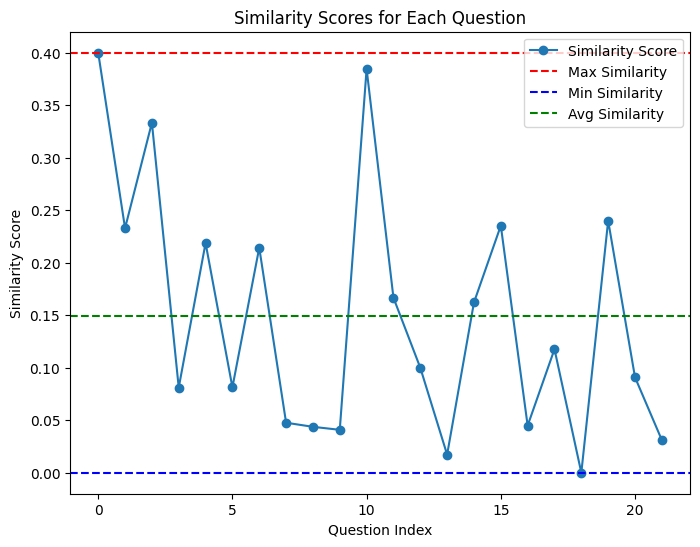

In [ ]:
# Plotting the data
df = progress_df
plt.figure(figsize=(8, 6))
plt.plot(df['similarity'], label='Similarity Score', marker='o')
plt.axhline(y=df['similarity'].max(), color='r', linestyle='--', label='Max Similarity')
plt.axhline(y=df['similarity'].min(), color='b', linestyle='--', label='Min Similarity')
plt.axhline(y=df['similarity'].mean(), color='g', linestyle='--', label='Avg Similarity')

plt.title('Similarity Scores for Each Question')
plt.xlabel('Question Index')
plt.ylabel('Similarity Score')
plt.legend()
plt.show()